<div style=" background-color: #BED1CF;" >
<h1 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">PROJET 9 DATA ANALYST</h1>
<h2 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">Produisez une étude de marché avec Python
</h2>
</div>

<div style="background-color: #FFE4C9; color: Dark; padding: 10px; border-radius: 5px;">
  <h1 style="font-size: 22px;">1-Exploration des données</h1>
</div>

In [1]:
#Importation de la librairie Pandas
import pandas as pd

#Importation de la librairie NumPy
import numpy as np

#Importation de la librairie matplotlib 
import matplotlib.pyplot as plt

#Importation de la librairie seaborn 
import seaborn as sns

# Importation de la librairie math
import math



In [2]:
# Importation des differents fichiers


#Importation du fichier population.csv
population = pd.read_csv('Population_2000_2018.csv')

#Importation du fichier dispo_alimentaire.csv
dispo = pd.read_csv('DisponibiliteAlimentaire_2017.csv')

#Importation du fichier Prix de production.csv
Prix_prod = pd.read_csv('Prix de production.csv')

#Importation du fichier PIB/habitants.csv
PIB = pd.read_csv('PIB.csv')

#Importation du fichier stabilité.csv
Stabilité = pd.read_csv('stabilité.csv')

#Importation du fichier API2.csv
LPI = pd.read_csv('API2.csv',sep=';')

#Importation du fichier Impots.csv
Impot = pd.read_csv('Impots.csv',sep=';')

#Importation du fichier SJI.csv
SJI = pd.read_csv('SJI.csv',sep=';')





<div style="background-color: #F7DED0; color: black; padding: 10px; border-radius: 5px;">
  <h1 style="font-size: 18px;">1.1-DISPONIBILITE</h1>
</div>

In [3]:
# Information de la composition du fichier dispo

dispo.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176600 entries, 0 to 176599
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Code Domaine            176600 non-null  object 
 1   Domaine                 176600 non-null  object 
 2   Code zone               176600 non-null  int64  
 3   Zone                    176600 non-null  object 
 4   Code Élément            176600 non-null  int64  
 5   Élément                 176600 non-null  object 
 6   Code Produit            176600 non-null  int64  
 7   Produit                 176600 non-null  object 
 8   Code année              176600 non-null  int64  
 9   Année                   176600 non-null  int64  
 10  Unité                   176600 non-null  object 
 11  Valeur                  176600 non-null  float64
 12  Symbole                 176600 non-null  object 
 13  Description du Symbole  176600 non-null  object 
dtypes: float64(1), int64

In [4]:
# Affichage des differents 'Produit' du fichier dispo

divers_produits = dispo['Produit'].unique()
divers_produits 

array(['Blé et produits', 'Riz et produits', 'Orge et produits',
       'Maïs et produits', 'Seigle et produits', 'Avoine',
       'Millet et produits', 'Sorgho et produits', 'Céréales, Autres',
       'Pommes de Terre et produits', 'Ignames', 'Racines nda',
       'Sucre, canne', 'Sucre, betterave', 'Sucre Eq Brut',
       'Edulcorants Autres', 'Miel', 'Haricots', 'Pois',
       'Légumineuses Autres et produits', 'Noix et produits', 'Soja',
       'Arachides Decortiquees', 'Graines de tournesol',
       'Graines Colza/Moutarde', 'Graines de coton', 'Coco (Incl Coprah)',
       'Sésame', 'Olives', 'Plantes Oleiferes, Autre', 'Huile de Soja',
       "Huile d'Arachide", 'Huile de Tournesol',
       'Huile de Colza&Moutarde', 'Huile Graines de Coton',
       'Huile de Palmistes', 'Huile de Palme', 'Huile de Coco',
       'Huile de Sésame', "Huile d'Olive", 'Huile de Son de Riz',
       'Huile de Germe de Maïs', 'Huil Plantes Oleif Autr',
       'Tomates et produits', 'Oignons', 'Légumes, 

In [5]:
# Filtrer les données pour "Viande de Volailles"
volaille = dispo[dispo['Produit'] == 'Viande de Volailles']

# Afficher le df
volaille.head(11)

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
651,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5511,Production,2734,Viande de Volailles,2017,2017,Milliers de tonnes,28.00,S,Données standardisées
652,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5611,Importations - Quantité,2734,Viande de Volailles,2017,2017,Milliers de tonnes,29.00,S,Données standardisées
653,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5072,Variation de stock,2734,Viande de Volailles,2017,2017,Milliers de tonnes,0.00,S,Données standardisées
654,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5301,Disponibilité intérieure,2734,Viande de Volailles,2017,2017,Milliers de tonnes,57.00,S,Données standardisées
655,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5123,Pertes,2734,Viande de Volailles,2017,2017,Milliers de tonnes,2.00,S,Données standardisées
656,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5170,Résidus,2734,Viande de Volailles,2017,2017,Milliers de tonnes,0.00,S,Données standardisées
657,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5142,Nourriture,2734,Viande de Volailles,2017,2017,Milliers de tonnes,55.00,S,Données standardisées
658,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,645,Disponibilité alimentaire en quantité (kg/pers...,2734,Viande de Volailles,2017,2017,kg,1.53,Fc,Donnée calculée
659,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,664,Disponibilité alimentaire (Kcal/personne/jour),2734,Viande de Volailles,2017,2017,Kcal/personne/jour,5.00,Fc,Donnée calculée
660,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,674,Disponibilité de protéines en quantité (g/pers...,2734,Viande de Volailles,2017,2017,g/personne/jour,0.54,Fc,Donnée calculée


In [6]:
# Filtrer 'Zone', 'Élément', 'Unité', 'Valeur'
Volaille = volaille[['Zone', 'Élément', 'Unité', 'Valeur']]

# Afficher les premières lignes du DataFrame filtré
Volaille.head(11)

,Zone,Élément,Unité,Valeur
651,Afghanistan,Production,Milliers de tonnes,28.00
652,Afghanistan,Importations - Quantité,Milliers de tonnes,29.00
653,Afghanistan,Variation de stock,Milliers de tonnes,0.00
654,Afghanistan,Disponibilité intérieure,Milliers de tonnes,57.00
655,Afghanistan,Pertes,Milliers de tonnes,2.00
656,Afghanistan,Résidus,Milliers de tonnes,0.00
657,Afghanistan,Nourriture,Milliers de tonnes,55.00
658,Afghanistan,Disponibilité alimentaire en quantité (kg/pers...,kg,1.53
659,Afghanistan,Disponibilité alimentaire (Kcal/personne/jour),Kcal/personne/jour,5.00
660,Afghanistan,Disponibilité de protéines en quantité (g/pers...,g/personne/jour,0.54


In [7]:
# Supprimer la colonne 'Unité' car elle ne sera plus nécessaire après le pivot
DFVolaille = Volaille.drop(columns=['Unité'])

# Pivot du DF pour mettre les éléments en colonnes
DFVolaille = Volaille.pivot(index='Zone', columns='Élément', values='Valeur')

# Réinitialiser l'index
DFVolaille = DFVolaille.reset_index()

# Afficher DF
DFVolaille.head()

Élément,Zone,Alimentation pour touristes,Aliments pour animaux,Autres utilisations (non alimentaire),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Résidus,Semences,Traitement,Variation de stock
0,Afghanistan,NaN,NaN,NaN,5.0,1.53,0.33,0.54,57.0,NaN,29.0,55.0,2.0,28.0,0.0,NaN,NaN,0.0
1,Afrique du Sud,0.0,NaN,NaN,143.0,35.69,9.25,14.11,2118.0,63.0,514.0,2035.0,83.0,1667.0,0.0,NaN,NaN,-0.0
2,Albanie,NaN,NaN,NaN,85.0,16.36,6.45,6.26,47.0,0.0,38.0,47.0,NaN,13.0,0.0,NaN,NaN,4.0
3,Algérie,0.0,NaN,NaN,22.0,6.38,1.50,1.97,277.0,0.0,2.0,264.0,13.0,275.0,0.0,NaN,NaN,0.0
4,Allemagne,NaN,NaN,NaN,71.0,19.47,4.16,7.96,1739.0,646.0,842.0,1609.0,NaN,1514.0,-38.0,NaN,167.0,-29.0


In [8]:
# Filtrer les variables qui nous intéressent
DFVolaille = DFVolaille[['Zone','Disponibilité intérieure', 'Importations - Quantité', 'Production', 'Disponibilité alimentaire en quantité (kg/personne/an)']]

# Afficher DF
DFVolaille.head(11)

Élément,Zone,Disponibilité intérieure,Importations - Quantité,Production,Disponibilité alimentaire en quantité (kg/personne/an)
0,Afghanistan,57.0,29.0,28.0,1.53
1,Afrique du Sud,2118.0,514.0,1667.0,35.69
2,Albanie,47.0,38.0,13.0,16.36
3,Algérie,277.0,2.0,275.0,6.38
4,Allemagne,1739.0,842.0,1514.0,19.47
5,Angola,319.0,277.0,42.0,10.56
6,Antigua-et-Barbuda,7.0,7.0,0.0,54.10
7,Arabie saoudite,1435.0,722.0,616.0,43.36
8,Argentine,1962.0,8.0,2161.0,42.24
9,Arménie,47.0,35.0,11.0,16.06


In [9]:
# Information sur la composition du fichier DFVolaille

DFVolaille.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172 entries, 0 to 171
Data columns (total 5 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Zone                                                    172 non-null    object 
 1   Disponibilité intérieure                                170 non-null    float64
 2   Importations - Quantité                                 170 non-null    float64
 3   Production                                              168 non-null    float64
 4   Disponibilité alimentaire en quantité (kg/personne/an)  172 non-null    float64
dtypes: float64(4), object(1)
memory usage: 6.8+ KB


In [10]:
# Renommer les colonnes
DFVolaille = DFVolaille.rename(columns={
    'Zone': 'Pays',
    'Importations - Quantité': 'Importations',
    'Disponibilité alimentaire en quantité (kg/personne/an)': 'Dispo alim (kg/perso/an)'
})

# Affichage du DF
DFVolaille.head()

Élément,Pays,Disponibilité intérieure,Importations,Production,Dispo alim (kg/perso/an)
0,Afghanistan,57.0,29.0,28.0,1.53
1,Afrique du Sud,2118.0,514.0,1667.0,35.69
2,Albanie,47.0,38.0,13.0,16.36
3,Algérie,277.0,2.0,275.0,6.38
4,Allemagne,1739.0,842.0,1514.0,19.47


In [11]:
# Afficher les lignes contenant des NaN

null_values_rows = DFVolaille[DFVolaille.isnull().any(axis=1)]

null_values_rows

Élément,Pays,Disponibilité intérieure,Importations,Production,Dispo alim (kg/perso/an)
43,Djibouti,3.0,3.0,NaN,2.68
92,Maldives,12.0,12.0,NaN,13.50
113,Ouzbékistan,NaN,NaN,NaN,1.96
130,République démocratique populaire lao,NaN,NaN,NaN,10.91


In [12]:
# Supprimer les NaN

DFVolaille = DFVolaille.dropna()

DFVolaille.isnull().sum()

Élément
Pays                        0
Disponibilité intérieure    0
Importations                0
Production                  0
Dispo alim (kg/perso/an)    0
dtype: int64

In [13]:
# Information sur la composition du fichier DFVolaille

DFVolaille.info()

<class 'pandas.core.frame.DataFrame'>
Index: 168 entries, 0 to 171
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pays                      168 non-null    object 
 1   Disponibilité intérieure  168 non-null    float64
 2   Importations              168 non-null    float64
 3   Production                168 non-null    float64
 4   Dispo alim (kg/perso/an)  168 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.9+ KB


In [14]:
# Vérification de l'unicité de la variable Pays 

DFVolaille['Pays'].nunique()

168

<div style="background-color: #F7DED0; color: black; padding: 10px; border-radius: 5px;">
  <h1 style="font-size: 18px;">1.2-POPULATION</h1>
</div>

In [15]:
# Information sur la composition du fichier DFVolaille

population.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4411 entries, 0 to 4410
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Code Domaine            4411 non-null   object 
 1   Domaine                 4411 non-null   object 
 2   Code zone               4411 non-null   int64  
 3   Zone                    4411 non-null   object 
 4   Code Élément            4411 non-null   int64  
 5   Élément                 4411 non-null   object 
 6   Code Produit            4411 non-null   int64  
 7   Produit                 4411 non-null   object 
 8   Code année              4411 non-null   int64  
 9   Année                   4411 non-null   int64  
 10  Unité                   4411 non-null   object 
 11  Valeur                  4411 non-null   float64
 12  Symbole                 4411 non-null   object 
 13  Description du Symbole  4411 non-null   object 
 14  Note                    258 non-null    

In [16]:
# Affichage du DF Population

population

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2000,2000,1000 personnes,20779.953,X,Sources internationales sûres,NaN
1,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2001,2001,1000 personnes,21606.988,X,Sources internationales sûres,NaN
2,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2002,2002,1000 personnes,22600.770,X,Sources internationales sûres,NaN
3,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2003,2003,1000 personnes,23680.871,X,Sources internationales sûres,NaN
4,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2004,2004,1000 personnes,24726.684,X,Sources internationales sûres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4406,OA,Séries temporelles annuelles,181,Zimbabwe,511,Population totale,3010,Population-Estimations,2014,2014,1000 personnes,13586.707,X,Sources internationales sûres,NaN
4407,OA,Séries temporelles annuelles,181,Zimbabwe,511,Population totale,3010,Population-Estimations,2015,2015,1000 personnes,13814.629,X,Sources internationales sûres,NaN
4408,OA,Séries temporelles annuelles,181,Zimbabwe,511,Population totale,3010,Population-Estimations,2016,2016,1000 personnes,14030.331,X,Sources internationales sûres,NaN
4409,OA,Séries temporelles annuelles,181,Zimbabwe,511,Population totale,3010,Population-Estimations,2017,2017,1000 personnes,14236.595,X,Sources internationales sûres,NaN


In [17]:
# Filtrer les colonnes nécessaires (Pays, Année, Valeur)
Population = population[['Zone', 'Année', 'Valeur']]

# Renommer la colonne 'Zone' en 'Pays'
Population = Population.rename(columns={'Zone': 'Pays'})

# Pivot pour avoir les années en colonnes
Population = Population.pivot(index='Pays', columns='Année', values='Valeur').reset_index()

# Renommer les colonnes
Population.columns = ['Pays'] + [f'Population_{int(col)}' for col in Population.columns[1:]]

# Multiplier les valeurs de population par 1000

Population['Population_2017'] = Population['Population_2017'] * 1000


# Sélectionner uniquement les colonnes de la population de 2017 
Population = Population[['Pays', 'Population_2017']]

# Renommer les colonne 'Population_2017' en 'Population'
PopulationDF = Population.rename(columns={'Population_2017': 'Population'})

# Affichage du dataframe Population
PopulationDF



,Pays,Population
0,Afghanistan,36296113.0
1,Afrique du Sud,57009756.0
2,Albanie,2884169.0
3,Algérie,41389189.0
4,Allemagne,82658409.0
...,...,...
233,Îles Salomon,636039.0
234,Îles Turques-et-Caïques,37115.0
235,Îles Vierges américaines,104751.0
236,Îles Vierges britanniques,29577.0


In [18]:
# Renommer les colonne 'Population_2017' en 'Population'
PopulationDF = Population.rename(columns={'Population_2017': 'Population'})
PopulationDF

,Pays,Population
0,Afghanistan,36296113.0
1,Afrique du Sud,57009756.0
2,Albanie,2884169.0
3,Algérie,41389189.0
4,Allemagne,82658409.0
...,...,...
233,Îles Salomon,636039.0
234,Îles Turques-et-Caïques,37115.0
235,Îles Vierges américaines,104751.0
236,Îles Vierges britanniques,29577.0


In [19]:
# Information de la composition du fichier PopulationDF

PopulationDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pays        238 non-null    object 
 1   Population  236 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.8+ KB


In [20]:
# Affichage des lignes contenant de NaN

null_values = PopulationDF[Population.isnull().any(axis=1)]
null_values

,Pays,Population
182,Serbie-et-Monténégro,NaN
191,Soudan (ex),NaN


In [21]:
# Supprimer les lignes avec des valeurs nulles dans les colonnes spécifiées
PopulationDF.dropna(subset='Population', inplace=True)

# Information de la composition du DF 
PopulationDF.info()

<class 'pandas.core.frame.DataFrame'>
Index: 236 entries, 0 to 237
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pays        236 non-null    object 
 1   Population  236 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.5+ KB


In [22]:
# Convertir la population en nombres entiers
PopulationDF['Population'] = PopulationDF['Population'].astype(int)

# Vérification avec l'affichage du DF
PopulationDF

,Pays,Population
0,Afghanistan,36296113
1,Afrique du Sud,57009756
2,Albanie,2884169
3,Algérie,41389189
4,Allemagne,82658409
...,...,...
233,Îles Salomon,636039
234,Îles Turques-et-Caïques,37115
235,Îles Vierges américaines,104751
236,Îles Vierges britanniques,29577


In [23]:
#Création d'espace entre les milliers pour une meilleure lisibilité 
PopulationDF['Population'] = PopulationDF['Population'].apply(lambda x: f"{int(x):,}".replace(',', ' '))

# Vérification avec l'affichage du DF
PopulationDF

,Pays,Population
0,Afghanistan,36 296 113
1,Afrique du Sud,57 009 756
2,Albanie,2 884 169
3,Algérie,41 389 189
4,Allemagne,82 658 409
...,...,...
233,Îles Salomon,636 039
234,Îles Turques-et-Caïques,37 115
235,Îles Vierges américaines,104 751
236,Îles Vierges britanniques,29 577


In [24]:
#Information de la composition de PopulationDF

PopulationDF.info()

<class 'pandas.core.frame.DataFrame'>
Index: 236 entries, 0 to 237
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Pays        236 non-null    object
 1   Population  236 non-null    object
dtypes: object(2)
memory usage: 5.5+ KB


In [25]:
# Vérification de l'unicité de la variable 'Pays'

PopulationDF['Pays'].nunique()

236

<div style="background-color: #F7DED0; color: black; padding: 10px; border-radius: 5px;">
  <h1 style="font-size: 18px;">1.3-PIB/HABITANT</h1>
</div>

In [26]:
# Information de la composition du df PIB

PIB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 0 to 210
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Code Domaine            211 non-null    object 
 1   Domaine                 211 non-null    object 
 2   Code zone (M49)         211 non-null    int64  
 3   Zone                    211 non-null    object 
 4   Code Élément            211 non-null    int64  
 5   Élément                 211 non-null    object 
 6   Code Produit            211 non-null    int64  
 7   Produit                 211 non-null    object 
 8   Code année              211 non-null    int64  
 9   Année                   211 non-null    int64  
 10  Unité                   211 non-null    object 
 11  Valeur                  211 non-null    float64
 12  Symbole                 211 non-null    object 
 13  Description du Symbole  211 non-null    object 
 14  Note                    0 non-null      fl

In [27]:
# Affichage du DF PIB

PIB

,Code Domaine,Domaine,Code zone (M49),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,MK,Indicateurs macro,4,Afghanistan,6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2017,2017,USD,534.020133,X,Ciffre de sources internationales,NaN
1,MK,Indicateurs macro,710,Afrique du Sud,6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2017,2017,USD,6723.928582,X,Ciffre de sources internationales,NaN
2,MK,Indicateurs macro,8,Albanie,6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2017,2017,USD,4521.752217,X,Ciffre de sources internationales,NaN
3,MK,Indicateurs macro,12,Algérie,6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2017,2017,USD,4134.936055,X,Ciffre de sources internationales,NaN
4,MK,Indicateurs macro,276,Allemagne,6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2017,2017,USD,44670.222282,X,Ciffre de sources internationales,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206,MK,Indicateurs macro,862,Venezuela (République bolivarienne du),6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2017,2017,USD,8083.225762,X,Ciffre de sources internationales,NaN
207,MK,Indicateurs macro,704,Viet Nam,6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2017,2017,USD,2992.071534,X,Ciffre de sources internationales,NaN
208,MK,Indicateurs macro,887,Yémen,6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2017,2017,USD,612.353054,X,Ciffre de sources internationales,NaN
209,MK,Indicateurs macro,894,Zambie,6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2017,2017,USD,1497.004453,X,Ciffre de sources internationales,NaN


In [28]:
# Filtrer les colonnes nécessaires (Pays, Année, Valeur)
PIB = PIB[['Zone', 'Année', 'Valeur']]

# Renommer la colonne 'Zone' en 'Pays'
PIB = PIB.rename(columns={'Zone': 'Pays' })

# Pivot pour avoir les années en colonnes
PIB = PIB.pivot(index='Pays', columns='Année', values='Valeur').reset_index()

# Affichage du DF PIB
PIB

Année,Pays,2017
0,Afghanistan,534.020133
1,Afrique du Sud,6723.928582
2,Albanie,4521.752217
3,Algérie,4134.936055
4,Allemagne,44670.222282
...,...,...
206,Îles Cook,19868.296031
207,Îles Marshall,4507.623879
208,Îles Salomon,2283.581124
209,Îles Turques-et-Caïques,25659.195864


In [29]:
print(PIB.columns)
print(PIB.head())

Index(['Pays', 2017], dtype='object', name='Année')
Année            Pays          2017
0         Afghanistan    534.020133
1      Afrique du Sud   6723.928582
2             Albanie   4521.752217
3             Algérie   4134.936055
4           Allemagne  44670.222282


In [30]:
# Convertir les noms de colonnes en chaînes de caractères
PIB.columns = PIB.columns.astype(str)

# Renommer la colonne '2017' en 'PIB/habitant($)'
PIB = PIB.rename(columns={'2017': 'PIB/habitant($)'})

PIB

Année,Pays,PIB/habitant($)
0,Afghanistan,534.020133
1,Afrique du Sud,6723.928582
2,Albanie,4521.752217
3,Algérie,4134.936055
4,Allemagne,44670.222282
...,...,...
206,Îles Cook,19868.296031
207,Îles Marshall,4507.623879
208,Îles Salomon,2283.581124
209,Îles Turques-et-Caïques,25659.195864


In [31]:
# Convertir la variable 'PIB/habitant($)' en nombres entiers
PIB['PIB/habitant($)']= PIB['PIB/habitant($)'].astype(int)

PIB['PIB/habitant($)']= PIB['PIB/habitant($)'].apply(lambda x: f"{int(x):,}".replace(',', ' '))

PIB.index.name = 'index'

PIB

Année,Pays,PIB/habitant($)
index,,
0,Afghanistan,534
1,Afrique du Sud,6 723
2,Albanie,4 521
3,Algérie,4 134
4,Allemagne,44 670
...,...,...
206,Îles Cook,19 868
207,Îles Marshall,4 507
208,Îles Salomon,2 283


In [32]:
#Information de la composition du DF PIB

PIB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 0 to 210
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Pays             211 non-null    object
 1   PIB/habitant($)  211 non-null    object
dtypes: object(2)
memory usage: 3.4+ KB


In [33]:
# Vérification de l'unicité de la variable 'Pays'

PIB['Pays'].nunique()

211

<div style="background-color: #F7DED0; color: black; padding: 10px; border-radius: 5px;">
  <h1 style="font-size: 18px;">1.4-Stabilité Politique</h1>
</div>

In [34]:
# Information sur la composition du DF Stabilité

Stabilité.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 460 entries, 0 to 459
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Code Domaine            460 non-null    object 
 1   Domaine                 460 non-null    object 
 2   Code zone (M49)         460 non-null    int64  
 3   Zone                    460 non-null    object 
 4   Code Élément            460 non-null    int64  
 5   Élément                 460 non-null    object 
 6   Code Produit            460 non-null    int64  
 7   Produit                 460 non-null    object 
 8   Code année              460 non-null    int64  
 9   Année                   460 non-null    int64  
 10  Unité                   264 non-null    object 
 11  Valeur                  460 non-null    float64
 12  Symbole                 460 non-null    object 
 13  Description du Symbole  460 non-null    object 
 14  Note                    0 non-null      fl

In [35]:
# Affichage du DF Stabilité

Stabilité

,Code Domaine,Domaine,Code zone (M49),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,FS,Données de la sécurité alimentaire,4,Afghanistan,6126,Valeur,22013,"PIB par habitant, ($ PPA internationaux consta...",2017,2017,Int$/cap,2096.10,X,Ciffre de sources internationales,NaN
1,FS,Données de la sécurité alimentaire,4,Afghanistan,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2017,2017,NaN,-2.80,X,Ciffre de sources internationales,NaN
2,FS,Données de la sécurité alimentaire,710,Afrique du Sud,6124,Valeur,21016,Densité du réseau ferroviaire (pour 100 km car...,2017,2017,km,1.70,X,Ciffre de sources internationales,NaN
3,FS,Données de la sécurité alimentaire,710,Afrique du Sud,6126,Valeur,22013,"PIB par habitant, ($ PPA internationaux consta...",2017,2017,Int$/cap,13950.50,X,Ciffre de sources internationales,NaN
4,FS,Données de la sécurité alimentaire,710,Afrique du Sud,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2017,2017,NaN,-0.28,X,Ciffre de sources internationales,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
455,FS,Données de la sécurité alimentaire,894,Zambie,6124,Valeur,21016,Densité du réseau ferroviaire (pour 100 km car...,2017,2017,km,0.20,X,Ciffre de sources internationales,NaN
456,FS,Données de la sécurité alimentaire,894,Zambie,6126,Valeur,22013,"PIB par habitant, ($ PPA internationaux consta...",2017,2017,Int$/cap,3395.50,X,Ciffre de sources internationales,NaN
457,FS,Données de la sécurité alimentaire,894,Zambie,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2017,2017,NaN,0.15,X,Ciffre de sources internationales,NaN
458,FS,Données de la sécurité alimentaire,716,Zimbabwe,6126,Valeur,22013,"PIB par habitant, ($ PPA internationaux consta...",2017,2017,Int$/cap,2331.80,X,Ciffre de sources internationales,NaN


In [36]:
# Affichage des differents produit du DF Stabilité

produits = Stabilité['Produit'].unique()
produits

array(['PIB par habitant, ($ PPA internationaux constants de 2017)',
       'Stabilité politique et absence de violence/terrorisme (indice)',
       'Densité du réseau ferroviaire (pour 100 km carrés de surface totale du pays)'],
      dtype=object)

In [37]:
# Filtrer les données pour "Viande de Volailles"
Stabilité = Stabilité[Stabilité['Produit'] == 'Stabilité politique et absence de violence/terrorisme (indice)']


# Affichage du DF Stabilité
Stabilité

,Code Domaine,Domaine,Code zone (M49),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
1,FS,Données de la sécurité alimentaire,4,Afghanistan,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2017,2017,NaN,-2.80,X,Ciffre de sources internationales,NaN
4,FS,Données de la sécurité alimentaire,710,Afrique du Sud,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2017,2017,NaN,-0.28,X,Ciffre de sources internationales,NaN
6,FS,Données de la sécurité alimentaire,8,Albanie,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2017,2017,NaN,0.38,X,Ciffre de sources internationales,NaN
9,FS,Données de la sécurité alimentaire,12,Algérie,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2017,2017,NaN,-0.92,X,Ciffre de sources internationales,NaN
12,FS,Données de la sécurité alimentaire,276,Allemagne,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2017,2017,NaN,0.59,X,Ciffre de sources internationales,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450,FS,Données de la sécurité alimentaire,862,Venezuela (République bolivarienne du),6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2017,2017,NaN,-1.27,X,Ciffre de sources internationales,NaN
453,FS,Données de la sécurité alimentaire,704,Viet Nam,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2017,2017,NaN,0.23,X,Ciffre de sources internationales,NaN
454,FS,Données de la sécurité alimentaire,887,Yémen,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2017,2017,NaN,-2.94,X,Ciffre de sources internationales,NaN
457,FS,Données de la sécurité alimentaire,894,Zambie,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2017,2017,NaN,0.15,X,Ciffre de sources internationales,NaN


In [38]:
# Filtrer les colonnes nécessaires (Pays, Année, Valeur)
Stabilité = Stabilité[['Zone', 'Produit', 'Valeur']]

# Renommer la colonne 'Zone' en 'Pays'
Stabilité = Stabilité.rename(columns={'Zone': 'Pays' })

# Pivot pour avoir les années en colonnes
Stabilité = Stabilité.pivot(index='Pays', columns='Produit', values='Valeur').reset_index()

Stabilité

Produit,Pays,Stabilité politique et absence de violence/terrorisme (indice)
0,Afghanistan,-2.80
1,Afrique du Sud,-0.28
2,Albanie,0.38
3,Algérie,-0.92
4,Allemagne,0.59
...,...,...
191,Érythrée,-0.73
192,États-Unis d'Amérique,0.29
193,Éthiopie,-1.68
194,Îles Marshall,0.87


In [39]:
# Information sur la composition du DF Stabilité

Stabilité.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 2 columns):
 #   Column                                                          Non-Null Count  Dtype  
---  ------                                                          --------------  -----  
 0   Pays                                                            196 non-null    object 
 1   Stabilité politique et absence de violence/terrorisme (indice)  196 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.2+ KB


In [40]:
# Vérification de l'unicité de la variable 'Pays'

Stabilité['Pays'].nunique()

196

<div style="background-color: #F7DED0; color: black; padding: 10px; border-radius: 5px;">
  <h1 style="font-size: 18px;">1.5-LPI</h1>
</div>

In [41]:
# Information sur la composition du DF LPI

LPI.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    235 non-null    object 
 1   Country Code    235 non-null    object 
 2   Indicator Name  235 non-null    object 
 3   Indicator Code  235 non-null    object 
 4   2007            167 non-null    object 
 5   2010            172 non-null    object 
 6   2012            171 non-null    object 
 7   2013            0 non-null      float64
 8   2014            177 non-null    object 
 9   2015            0 non-null      float64
 10  2016            177 non-null    object 
 11  2017            0 non-null      float64
 12  2018            177 non-null    object 
 13  2022            156 non-null    object 
dtypes: float64(3), object(11)
memory usage: 25.8+ KB


In [42]:
# Affichage du DF LPI

LPI

,Country Name,Country Code,Indicator Name,Indicator Code,2007,2010,2012,2013,2014,2015,2016,2017,2018,2022
0,Aruba,ABW,Indice de performance logistique : performance...,LP.LPI.OVRL.XQ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,Indice de performance logistique : performance...,LP.LPI.OVRL.XQ,"1,21","2,24","2,3",NaN,"2,069573",NaN,"2,141282",NaN,"1,95","1,9"
2,Angola,AGO,Indice de performance logistique : performance...,LP.LPI.OVRL.XQ,"2,48","2,25","2,28",NaN,"2,54298",NaN,"2,241183",NaN,"2,05","2,1"
3,Albanie,ALB,Indice de performance logistique : performance...,LP.LPI.OVRL.XQ,"2,08","2,46","2,77",NaN,NaN,NaN,"2,412498",NaN,"2,66","2,5"
4,Andorre,AND,Indice de performance logistique : performance...,LP.LPI.OVRL.XQ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,Kosovo,XKX,Indice de performance logistique : performance...,LP.LPI.OVRL.XQ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
231,"Yémen, Rép. du",YEM,Indice de performance logistique : performance...,LP.LPI.OVRL.XQ,"2,29","2,58","2,89",NaN,"2,18395",NaN,NaN,NaN,"2,27","2,2"
232,Afrique du Sud,ZAF,Indice de performance logistique : performance...,LP.LPI.OVRL.XQ,"3,53","3,46","3,67",NaN,"3,431244",NaN,"3,775321",NaN,"3,38","3,7"
233,Zambie,ZMB,Indice de performance logistique : performance...,LP.LPI.OVRL.XQ,"2,37","2,28",NaN,NaN,"2,462674",NaN,"2,429813",NaN,"2,53",NaN


In [43]:
 # Filtrer les colonnes nécessaires (Pays, Année, Valeur)
LPI = LPI[['Country Name', '2018']]

# Renommer la colonne 'Zone' en 'Pays'
LPI = LPI.rename(columns={'Country Name': 'Pays'})

LPI

,Pays,2018
0,Aruba,NaN
1,Afghanistan,"1,95"
2,Angola,"2,05"
3,Albanie,"2,66"
4,Andorre,NaN
...,...,...
230,Kosovo,NaN
231,"Yémen, Rép. du","2,27"
232,Afrique du Sud,"3,38"
233,Zambie,"2,53"


In [44]:
# Convertir les noms de colonnes en chaînes de caractères
LPI.columns = LPI.columns.astype(str)

# Renommer la colonne '2017' en 'PIB/habitant($)'
LPI = LPI.rename(columns={'2018':'Indice de performance logistique'})

LPI

,Pays,Indice de performance logistique
0,Aruba,NaN
1,Afghanistan,"1,95"
2,Angola,"2,05"
3,Albanie,"2,66"
4,Andorre,NaN
...,...,...
230,Kosovo,NaN
231,"Yémen, Rép. du","2,27"
232,Afrique du Sud,"3,38"
233,Zambie,"2,53"


In [45]:
# Information sur la composition du DF LPI

LPI.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 2 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Pays                              235 non-null    object
 1   Indice de performance logistique  177 non-null    object
dtypes: object(2)
memory usage: 3.8+ KB


In [46]:
# Affichage des lignes contenant de NaN 

nan = LPI[LPI.isnull().any(axis=1)]
nan

,Pays,Indice de performance logistique
0,Aruba,NaN
4,Andorre,NaN
8,Samoa américaines,NaN
9,Antigua-et-Barbuda,NaN
12,Azerbaïdjan,NaN
23,Belize,NaN
24,Bermudes,NaN
27,Barbade,NaN
30,Botswana,NaN
34,Îles Anglo-Normandes,NaN


In [47]:
# Suppression des lignes contenant des NaN

LPI = LPI.dropna()

# Vérification 

LPI.isnull().sum()

Pays                                0
Indice de performance logistique    0
dtype: int64

In [48]:
# Information sur la composition du DF LPI

LPI.info()

<class 'pandas.core.frame.DataFrame'>
Index: 177 entries, 1 to 234
Data columns (total 2 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Pays                              177 non-null    object
 1   Indice de performance logistique  177 non-null    object
dtypes: object(2)
memory usage: 4.1+ KB


In [49]:
# Vérification de l'unicité de la variable 'Pays'

LPI['Pays'].nunique()

177

<div style="background-color: #F7DED0; color: black; padding: 10px; border-radius: 5px;">
  <h1 style="font-size: 18px;">1.6-Impot</h1>
</div>

In [50]:
# Information sur la composition du DF Impot

Impot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Country Name    263 non-null    object
 1   Country Code    263 non-null    object
 2   Indicator Name  263 non-null    object
 3   Indicator Code  263 non-null    object
 4   2005            207 non-null    object
 5   2006            211 non-null    object
 6   2007            214 non-null    object
 7   2008            215 non-null    object
 8   2009            216 non-null    object
 9   2010            216 non-null    object
 10  2011            218 non-null    object
 11  2012            222 non-null    object
 12  2013            233 non-null    object
 13  2014            233 non-null    object
 14  2015            233 non-null    object
 15  2016            233 non-null    object
 16  2017            233 non-null    object
 17  2018            234 non-null    object
 18  2019      

In [51]:
# Affichage du DF Impot 

Impot

,Country Name,Country Code,Indicator Name,Indicator Code,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,ABW,Taux d'imposition et cotisations du travail (%...,IC.TAX.LABR.CP.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,Taux d'imposition et cotisations du travail (%...,IC.TAX.LABR.CP.ZS,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Angola,AGO,Taux d'imposition et cotisations du travail (%...,IC.TAX.LABR.CP.ZS,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9
3,Albanie,ALB,Taux d'imposition et cotisations du travail (%...,IC.TAX.LABR.CP.ZS,"34,6","34,6","24,5","28,6","31,9","27,3",25,"25,3","18,8","18,8","18,8","18,8","18,8","18,8","18,8"
4,Andorre,AND,Taux d'imposition et cotisations du travail (%...,IC.TAX.LABR.CP.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,Kosovo,XKX,Taux d'imposition et cotisations du travail (%...,IC.TAX.LABR.CP.ZS,NaN,NaN,NaN,NaN,"5,6","5,6","5,6","5,6","5,6","5,6","5,6","5,6","5,6","5,6","5,6"
259,"Yémen, Rép. du",YEM,Taux d'imposition et cotisations du travail (%...,IC.TAX.LABR.CP.ZS,"11,3","11,3","11,3","11,3","11,3","11,3","11,3","11,3","11,3","11,3","11,3","11,3","11,3","11,3","11,3"
260,Afrique du Sud,ZAF,Taux d'imposition et cotisations du travail (%...,IC.TAX.LABR.CP.ZS,"4,5","4,5","4,3","2,3","2,4","2,5","4,1","4,1",4,4,4,4,4,4,4
261,Zambie,ZMB,Taux d'imposition et cotisations du travail (%...,IC.TAX.LABR.CP.ZS,"10,4","10,4","10,4","10,4","10,4","10,4","10,4","10,4","10,4","10,4","10,4","10,4","10,4","10,4","10,4"


In [52]:
 # Filtrer les colonnes nécessaires (Pays, Année, Valeur)
Impot = Impot[['Country Name', '2017']]

# Renommer la colonne 'Zone' en 'Pays'
Impot = Impot.rename(columns={'Country Name': 'Pays'})

Impot

,Pays,2017
0,Aruba,NaN
1,Afghanistan,0
2,Angola,9
3,Albanie,"18,8"
4,Andorre,NaN
...,...,...
258,Kosovo,"5,6"
259,"Yémen, Rép. du","11,3"
260,Afrique du Sud,4
261,Zambie,"10,4"


In [53]:
# Convertir les noms de colonnes en chaînes de caractères
Impot.columns = Impot.columns.astype(str)

# Renommer la colonne '2017' en 'Taux d'imposition et cotisations du travail (%)'
Impot = Impot.rename(columns={'2017':'Taux imposition et cotisations du travail (%)'})

Impot

,Pays,Taux imposition et cotisations du travail (%)
0,Aruba,NaN
1,Afghanistan,0
2,Angola,9
3,Albanie,"18,8"
4,Andorre,NaN
...,...,...
258,Kosovo,"5,6"
259,"Yémen, Rép. du","11,3"
260,Afrique du Sud,4
261,Zambie,"10,4"


In [54]:
# Suppression des lignes contenant des NaN puis vérification .

Impot = Impot.dropna()

Impot.isnull().sum()

Pays                                             0
Taux imposition et cotisations du travail (%)    0
dtype: int64

In [55]:
# Informations sur composition du DF Impot

Impot.info()

<class 'pandas.core.frame.DataFrame'>
Index: 233 entries, 1 to 262
Data columns (total 2 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   Pays                                           233 non-null    object
 1   Taux imposition et cotisations du travail (%)  233 non-null    object
dtypes: object(2)
memory usage: 5.5+ KB


In [56]:
# Vérification de l'unicité de la variable 'Pays'

Impot['Pays'].nunique()

233

<div style="background-color: #F7DED0; color: black; padding: 10px; border-radius: 5px;">
  <h1 style="font-size: 18px;">1.7-SJI</h1>
</div>

In [57]:
# Informations sur composition du DF SJI

SJI.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265 entries, 0 to 264
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Country Name    263 non-null    object
 1   Country Code    265 non-null    object
 2   Indicator Name  265 non-null    object
 3   Indicator Code  265 non-null    object
 4   2013            235 non-null    object
 5   2014            235 non-null    object
 6   2015            236 non-null    object
 7   2016            236 non-null    object
 8   2017            236 non-null    object
 9   2018            237 non-null    object
 10  2019            237 non-null    object
dtypes: object(11)
memory usage: 22.9+ KB


In [58]:
# Affichage de DF SJI

SJI

,Country Name,Country Code,Indicator Name,Indicator Code,2013,2014,2015,2016,2017,2018,2019
0,Aruba,ABW,Indice de la solidité des garanties juridiques...,IC.LGL.CRED.XQ,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,AFE,Indice de la solidité des garanties juridiques...,IC.LGL.CRED.XQ,4,"4,04","3,923076923","4,076923077","4,307692308","4,538461538","4,538461538"
2,Afghanistan,AFG,Indice de la solidité des garanties juridiques...,IC.LGL.CRED.XQ,9,9,9,9,9,10,10
3,NaN,AFW,Indice de la solidité des garanties juridiques...,IC.LGL.CRED.XQ,"5,409090909","5,409090909","5,590909091","5,681818182","5,863636364","5,863636364","5,863636364"
4,Angola,AGO,Indice de la solidité des garanties juridiques...,IC.LGL.CRED.XQ,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
260,Kosovo,XKX,Indice de la solidité des garanties juridiques...,IC.LGL.CRED.XQ,9,9,9,9,11,11,11
261,"Yémen, Rép. du",YEM,Indice de la solidité des garanties juridiques...,IC.LGL.CRED.XQ,0,0,0,0,0,0,0
262,Afrique du Sud,ZAF,Indice de la solidité des garanties juridiques...,IC.LGL.CRED.XQ,5,5,5,5,5,5,5
263,Zambie,ZMB,Indice de la solidité des garanties juridiques...,IC.LGL.CRED.XQ,7,7,7,7,11,11,11


In [59]:
 # Filtrer les colonnes nécessaires (Pays, Année, Valeur)
SJI = SJI[['Country Name', '2017']]

# Renommer la colonne 'Zone' en 'Pays'
SJI = SJI.rename(columns={'Country Name': 'Pays'})

# Afficher le DF SJI
SJI

,Pays,2017
0,Aruba,NaN
1,NaN,"4,307692308"
2,Afghanistan,9
3,NaN,"5,863636364"
4,Angola,1
...,...,...
260,Kosovo,11
261,"Yémen, Rép. du",0
262,Afrique du Sud,5
263,Zambie,11


In [60]:
# Convertir les noms de colonnes en chaînes de caractères
SJI.columns = SJI.columns.astype(str)

# Renommer la colonne '2017' en 'Taux d'imposition et cotisations du travail (%)'
SJI = SJI.rename(columns={'2017':'Indice de la solidité des garanties juridiques(0-12)'})

# Afficher le DF SJI
SJI

,Pays,Indice de la solidité des garanties juridiques(0-12)
0,Aruba,NaN
1,NaN,"4,307692308"
2,Afghanistan,9
3,NaN,"5,863636364"
4,Angola,1
...,...,...
260,Kosovo,11
261,"Yémen, Rép. du",0
262,Afrique du Sud,5
263,Zambie,11


In [61]:
# Supprimmé les ligne contenant un Nan puis vérification

SJI = SJI.dropna()

SJI.isnull().sum()

Pays                                                    0
Indice de la solidité des garanties juridiques(0-12)    0
dtype: int64

In [62]:
# Informations sur la composition du DF SJI

SJI.info()

<class 'pandas.core.frame.DataFrame'>
Index: 234 entries, 2 to 264
Data columns (total 2 columns):
 #   Column                                                Non-Null Count  Dtype 
---  ------                                                --------------  ----- 
 0   Pays                                                  234 non-null    object
 1   Indice de la solidité des garanties juridiques(0-12)  234 non-null    object
dtypes: object(2)
memory usage: 5.5+ KB


In [63]:
# Vérification de l'unicité de la variable 'Pays'

SJI['Pays'].nunique()

234

<div style="background-color: #FFE4C9; color: Dark; padding: 10px; border-radius: 5px;">
  <h1 style="font-size: 22px;">2-JOINTURE</h1>
</div>

In [64]:
# Correction de certains nom de Pays pour faciliter la jointure
country_mapping = {
    'Bolivie (État plurinational de)': 'Bolivie',
    'Chine, continentale': 'Chine',
    'Congo': 'Congo, République du',
    'Tchéquie': 'République tchèque',
    'Chine - RAS de Hong-Kong': 'Chine, RAS de Hong Kong',
    'Iran (République islamique d\')': 'Iran, République islamique d’',
    'Venezuela (République bolivarienne du)': 'Venezuela',
    'États-Unis d\'Amérique': 'États-Unis',
    'Yémen': 'Yémen, Rép. du',
    'Égypte': 'Égypte, République arabe d’',
    'République de Corée': 'Corée, République de',
    'République-Unie de Tanzanie': 'Tanzanie',
    'Royaume-Uni de Grande-Bretagne et d\'Irlande du Nord': 'Royaume-Uni',
    'Slovaquie': 'République slovaque',
    'République de Moldova': 'Moldova',
    'Pays-Bas (Royaume des)': 'Pays-Bas',
    'République populaire démocratique de Corée': 'Corée, République démocratique de'
}

# Remplacer les noms des pays pour chacun des DF concernés

DFVolaille.loc[:, 'Pays'] = DFVolaille['Pays'].replace(country_mapping)
PIB.loc[:, 'Pays'] = PIB['Pays'].replace(country_mapping)
PopulationDF.loc[:, 'Pays'] = PopulationDF['Pays'].replace(country_mapping)
Stabilité.loc[:, 'Pays'] = Stabilité['Pays'].replace(country_mapping)
LPI.loc[:, 'Pays'] = LPI['Pays'].replace(country_mapping)
Impot.loc[:, 'Pays'] = Impot['Pays'].replace(country_mapping)
SJI.loc[:, 'Pays'] = SJI['Pays'].replace(country_mapping)

# Effectuer les jointures par la gauche avec comme clé 'Pays'

DFLapoule = DFVolaille.merge(PopulationDF, on='Pays', how='left')
DFLapoule = DFLapoule.merge(PIB, on='Pays', how='left')
DFLapoule = DFLapoule.merge(Stabilité, on='Pays', how='left')
DFLapoule = DFLapoule.merge(LPI, on='Pays', how='left')
DFLapoule = DFLapoule.merge(Impot, on='Pays', how='left')
DFLapoule = DFLapoule.merge(SJI, on='Pays', how='left')

# Ajouter les valeurs manquantes pour l'Indice de performance logistique  

lpi_missing_values = {
    'Tanzanie': 2.53,
    'Pays-Bas': 4.02,
    'Mozambique': 2.37,
    'Namibie': 2.52,
    'Nicaragua': 2.48,
    'Venezuela': 2.23,
    'Azerbaïdjan': 2.46,
    'Botswana': 2.67,
    'Éthiopie': 2.38,
    'Yémen, Rép. du': 2.40
}

# Appliquer les valeurs manquantes à la colonne 'Indice de performance logistique' dans DFLapoule
for country, lpi_value in lpi_missing_values.items():
    DFLapoule.loc[DFLapoule['Pays'] == country, 'Indice de performance logistique'] = DFLapoule.loc[DFLapoule['Pays'] == country, 'Indice de performance logistique'].fillna(lpi_value)
    
# Ajouter la valeur manquante pour la 'Stabilité politique et absence de violence/terrorisme (indice)' pour la Chine
stabilite_missing_values = {
    'Chine': -0.23
}

# Appliquer les valeurs manquantes à la colonne 'Stabilité politique et absence de violence/terrorisme (indice)' dans DFLapoule
for country, stabilite_value in stabilite_missing_values.items():
    DFLapoule.loc[DFLapoule['Pays'] == country, 'Stabilité politique et absence de violence/terrorisme (indice)'] = DFLapoule.loc[DFLapoule['Pays'] == country, 'Stabilité politique et absence de violence/terrorisme (indice)'].fillna(stabilite_value)
    
DFLapoule    

,Pays,Disponibilité intérieure,Importations,Production,Dispo alim (kg/perso/an),Population,PIB/habitant($),Stabilité politique et absence de violence/terrorisme (indice),Indice de performance logistique,Taux imposition et cotisations du travail (%),Indice de la solidité des garanties juridiques(0-12)
0,Afghanistan,57.0,29.0,28.0,1.53,36 296 113,534,-2.80,"1,95",0,9
1,Afrique du Sud,2118.0,514.0,1667.0,35.69,57 009 756,6 723,-0.28,"3,38",4,5
2,Albanie,47.0,38.0,13.0,16.36,2 884 169,4 521,0.38,"2,66","18,8",8
3,Algérie,277.0,2.0,275.0,6.38,41 389 189,4 134,-0.92,"2,45","31,1",2
4,Allemagne,1739.0,842.0,1514.0,19.47,82 658 409,44 670,0.59,"4,2","21,4",6
...,...,...,...,...,...,...,...,...,...,...,...
164,Émirats arabes unis,412.0,433.0,48.0,43.47,9 487 203,43 063,0.62,"3,96","14,1",2
165,Équateur,341.0,0.0,340.0,19.31,16 785 361,6 246,-0.07,"2,88","13,7",1
166,États-Unis,18266.0,123.0,21914.0,55.68,325 084 756,59 468,0.29,"3,89","9,8",11
167,Éthiopie,14.0,1.0,14.0,0.13,106 399 924,709,-1.68,2.38,"12,4",3


In [65]:
# Informations sur la composition du DF DFLapoule

DFLapoule.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 11 columns):
 #   Column                                                          Non-Null Count  Dtype  
---  ------                                                          --------------  -----  
 0   Pays                                                            169 non-null    object 
 1   Disponibilité intérieure                                        169 non-null    float64
 2   Importations                                                    169 non-null    float64
 3   Production                                                      169 non-null    float64
 4   Dispo alim (kg/perso/an)                                        169 non-null    float64
 5   Population                                                      169 non-null    object 
 6   PIB/habitant($)                                                 168 non-null    object 
 7   Stabilité politique et absence de violence/terrorisme

In [66]:
# Affichage des lignes du DF comportant des NaN

NULLs = DFLapoule[DFLapoule.isnull().any(axis=1)]
NULLs

,Pays,Disponibilité intérieure,Importations,Production,Dispo alim (kg/perso/an),Population,PIB/habitant($),Stabilité politique et absence de violence/terrorisme (indice),Indice de performance logistique,Taux imposition et cotisations du travail (%),Indice de la solidité des garanties juridiques(0-12)
6,Antigua-et-Barbuda,7.0,7.0,0.0,54.10,95 426,16 110,0.75,NaN,"10,7",5
15,Barbade,17.0,2.0,15.0,46.78,286 232,17 881,0.97,NaN,"12,2",6
17,Belize,19.0,0.0,20.0,25.69,375 769,6 049,0.04,NaN,5,4
26,Cabo Verde,10.0,12.0,1.0,17.62,537 498,3 534,0.77,NaN,"17,6",1
32,Chine - RAS de Macao,19.0,23.0,3.0,34.47,622 585,78 896,1.43,NaN,NaN,NaN
33,"Chine, Taiwan Province de",785.0,161.0,652.0,33.17,23 674 546,NaN,NaN,NaN,NaN,NaN
41,Cuba,342.0,312.0,29.0,23.72,11 339 254,8 543,0.65,"2,2",NaN,NaN
44,Dominique,4.0,4.0,0.0,35.19,71 458,7 395,1.20,NaN,"7,9",6
48,Eswatini,7.0,2.0,6.0,6.46,1 124 805,3 822,-0.27,NaN,"5,7",4
56,Grenade,8.0,7.0,1.0,45.70,110 874,9 309,1.01,NaN,"5,6",6


In [67]:
# Suppression des lignes contenant un NaN et vérification 

DFLapoule = DFLapoule.dropna()

DFLapoule.isnull().sum()

Pays                                                              0
Disponibilité intérieure                                          0
Importations                                                      0
Production                                                        0
Dispo alim (kg/perso/an)                                          0
Population                                                        0
PIB/habitant($)                                                   0
Stabilité politique et absence de violence/terrorisme (indice)    0
Indice de performance logistique                                  0
Taux imposition et cotisations du travail (%)                     0
Indice de la solidité des garanties juridiques(0-12)              0
dtype: int64

In [68]:
# Informations de la composition du DFLapoule

DFLapoule.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146 entries, 0 to 168
Data columns (total 11 columns):
 #   Column                                                          Non-Null Count  Dtype  
---  ------                                                          --------------  -----  
 0   Pays                                                            146 non-null    object 
 1   Disponibilité intérieure                                        146 non-null    float64
 2   Importations                                                    146 non-null    float64
 3   Production                                                      146 non-null    float64
 4   Dispo alim (kg/perso/an)                                        146 non-null    float64
 5   Population                                                      146 non-null    object 
 6   PIB/habitant($)                                                 146 non-null    object 
 7   Stabilité politique et absence de violence/terrorisme (ind

In [69]:
# Vérification de l'unicité de la variable 'Pays' dans le DFLapoule

DFLapoule['Pays'].nunique()

145

In [70]:
# Afficher les doublons en fonction de la colonne 'Pays'
duplicated_rows = DFLapoule[DFLapoule.duplicated(subset=['Pays'])]

# Afficher les doublons
duplicated_rows

,Pays,Disponibilité intérieure,Importations,Production,Dispo alim (kg/perso/an),Population,PIB/habitant($),Stabilité politique et absence de violence/terrorisme (indice),Indice de performance logistique,Taux imposition et cotisations du travail (%),Indice de la solidité des garanties juridiques(0-12)
35,Chine,18161.0,452.0,18236.0,12.33,1 421 021 791,8 729,-0.23,"3,61","48,1",3


In [71]:
# Supprimer les doublons 
DFLapoule = DFLapoule.drop_duplicates()



In [72]:
#Vérification de l'unicité de la variable 'Pays' dans DFLapoule

DFLapoule['Pays'].nunique()

145

In [73]:
# Informations de la composition du DFLapoule

DFLapoule.info()


<class 'pandas.core.frame.DataFrame'>
Index: 146 entries, 0 to 168
Data columns (total 11 columns):
 #   Column                                                          Non-Null Count  Dtype  
---  ------                                                          --------------  -----  
 0   Pays                                                            146 non-null    object 
 1   Disponibilité intérieure                                        146 non-null    float64
 2   Importations                                                    146 non-null    float64
 3   Production                                                      146 non-null    float64
 4   Dispo alim (kg/perso/an)                                        146 non-null    float64
 5   Population                                                      146 non-null    object 
 6   PIB/habitant($)                                                 146 non-null    object 
 7   Stabilité politique et absence de violence/terrorisme (ind

In [74]:
# Afficher les lignes qui correspondent à la Chine.

chine_rows = DFLapoule[DFLapoule['Pays'] == 'Chine']
chine_rows

,Pays,Disponibilité intérieure,Importations,Production,Dispo alim (kg/perso/an),Population,PIB/habitant($),Stabilité politique et absence de violence/terrorisme (indice),Indice de performance logistique,Taux imposition et cotisations du travail (%),Indice de la solidité des garanties juridiques(0-12)
34,Chine,18161.0,452.0,18236.0,12.33,1 421 021 791,8 955,-0.23,"3,61","48,1",3
35,Chine,18161.0,452.0,18236.0,12.33,1 421 021 791,8 729,-0.23,"3,61","48,1",3


In [75]:
# Supprimer les doublons en conservant la première occurrence
DFLapoule = DFLapoule.drop_duplicates(subset=['Pays'], keep='first')

# Vérifier les doublons après suppression
chine_rows_after = DFLapoule[DFLapoule['Pays'] == 'Chine']

chine_rows_after

,Pays,Disponibilité intérieure,Importations,Production,Dispo alim (kg/perso/an),Population,PIB/habitant($),Stabilité politique et absence de violence/terrorisme (indice),Indice de performance logistique,Taux imposition et cotisations du travail (%),Indice de la solidité des garanties juridiques(0-12)
34,Chine,18161.0,452.0,18236.0,12.33,1 421 021 791,8 955,-0.23,"3,61","48,1",3


In [76]:
# Informations de la composition du DFLapoule

DFLapoule.info()

<class 'pandas.core.frame.DataFrame'>
Index: 145 entries, 0 to 168
Data columns (total 11 columns):
 #   Column                                                          Non-Null Count  Dtype  
---  ------                                                          --------------  -----  
 0   Pays                                                            145 non-null    object 
 1   Disponibilité intérieure                                        145 non-null    float64
 2   Importations                                                    145 non-null    float64
 3   Production                                                      145 non-null    float64
 4   Dispo alim (kg/perso/an)                                        145 non-null    float64
 5   Population                                                      145 non-null    object 
 6   PIB/habitant($)                                                 145 non-null    object 
 7   Stabilité politique et absence de violence/terrorisme (ind

In [77]:
# Afficher le DF DFLapoule

DFLapoule

,Pays,Disponibilité intérieure,Importations,Production,Dispo alim (kg/perso/an),Population,PIB/habitant($),Stabilité politique et absence de violence/terrorisme (indice),Indice de performance logistique,Taux imposition et cotisations du travail (%),Indice de la solidité des garanties juridiques(0-12)
0,Afghanistan,57.0,29.0,28.0,1.53,36 296 113,534,-2.80,"1,95",0,9
1,Afrique du Sud,2118.0,514.0,1667.0,35.69,57 009 756,6 723,-0.28,"3,38",4,5
2,Albanie,47.0,38.0,13.0,16.36,2 884 169,4 521,0.38,"2,66","18,8",8
3,Algérie,277.0,2.0,275.0,6.38,41 389 189,4 134,-0.92,"2,45","31,1",2
4,Allemagne,1739.0,842.0,1514.0,19.47,82 658 409,44 670,0.59,"4,2","21,4",6
...,...,...,...,...,...,...,...,...,...,...,...
164,Émirats arabes unis,412.0,433.0,48.0,43.47,9 487 203,43 063,0.62,"3,96","14,1",2
165,Équateur,341.0,0.0,340.0,19.31,16 785 361,6 246,-0.07,"2,88","13,7",1
166,États-Unis,18266.0,123.0,21914.0,55.68,325 084 756,59 468,0.29,"3,89","9,8",11
167,Éthiopie,14.0,1.0,14.0,0.13,106 399 924,709,-1.68,2.38,"12,4",3


In [78]:
#Convertir les variables numeriques en FLOAT

DFLapoule['Population'] = DFLapoule['Population'].str.replace(' ', '').str.replace(',', '').astype(float)
DFLapoule['PIB/habitant($)'] = DFLapoule['PIB/habitant($)'].str.replace(' ', '').str.replace(',', '').astype(float)
DFLapoule['Indice de performance logistique'] = DFLapoule['Indice de performance logistique'].str.replace(',', '.').str.replace(' ', '').astype(float)
DFLapoule['Taux imposition et cotisations du travail (%)'] = DFLapoule['Taux imposition et cotisations du travail (%)'].str.replace(',', '.').str.replace(' ', '').astype(float)
DFLapoule['Indice de la solidité des garanties juridiques(0-12)'] = DFLapoule['Indice de la solidité des garanties juridiques(0-12)'].str.replace(' ', '').str.replace(',', '').astype(float)

DFLapoule.info()

<class 'pandas.core.frame.DataFrame'>
Index: 145 entries, 0 to 168
Data columns (total 11 columns):
 #   Column                                                          Non-Null Count  Dtype  
---  ------                                                          --------------  -----  
 0   Pays                                                            145 non-null    object 
 1   Disponibilité intérieure                                        145 non-null    float64
 2   Importations                                                    145 non-null    float64
 3   Production                                                      145 non-null    float64
 4   Dispo alim (kg/perso/an)                                        145 non-null    float64
 5   Population                                                      145 non-null    float64
 6   PIB/habitant($)                                                 145 non-null    float64
 7   Stabilité politique et absence de violence/terrorisme (ind

In [79]:
# Afficher le DF DFLapoule


DFLapoule

,Pays,Disponibilité intérieure,Importations,Production,Dispo alim (kg/perso/an),Population,PIB/habitant($),Stabilité politique et absence de violence/terrorisme (indice),Indice de performance logistique,Taux imposition et cotisations du travail (%),Indice de la solidité des garanties juridiques(0-12)
0,Afghanistan,57.0,29.0,28.0,1.53,36296113.0,534.0,-2.80,1.95,0.0,9.0
1,Afrique du Sud,2118.0,514.0,1667.0,35.69,57009756.0,6723.0,-0.28,3.38,4.0,5.0
2,Albanie,47.0,38.0,13.0,16.36,2884169.0,4521.0,0.38,2.66,18.8,8.0
3,Algérie,277.0,2.0,275.0,6.38,41389189.0,4134.0,-0.92,2.45,31.1,2.0
4,Allemagne,1739.0,842.0,1514.0,19.47,82658409.0,44670.0,0.59,4.20,21.4,6.0
...,...,...,...,...,...,...,...,...,...,...,...
164,Émirats arabes unis,412.0,433.0,48.0,43.47,9487203.0,43063.0,0.62,3.96,14.1,2.0
165,Équateur,341.0,0.0,340.0,19.31,16785361.0,6246.0,-0.07,2.88,13.7,1.0
166,États-Unis,18266.0,123.0,21914.0,55.68,325084756.0,59468.0,0.29,3.89,9.8,11.0
167,Éthiopie,14.0,1.0,14.0,0.13,106399924.0,709.0,-1.68,NaN,12.4,3.0


In [80]:
# Afficher les lignes contenant un NaN

NULLss = DFLapoule[DFLapoule.isnull().any(axis=1)]
NULLss

,Pays,Disponibilité intérieure,Importations,Production,Dispo alim (kg/perso/an),Population,PIB/habitant($),Stabilité politique et absence de violence/terrorisme (indice),Indice de performance logistique,Taux imposition et cotisations du travail (%),Indice de la solidité des garanties juridiques(0-12)
12,Azerbaïdjan,129.0,27.0,104.0,13.11,9845320.0,4057.0,-0.75,NaN,24.8,2.0
20,Botswana,7.0,3.0,5.0,3.39,2205080.0,6705.0,1.02,NaN,0.0,5.0
100,Mozambique,116.0,24.0,92.0,3.59,28649018.0,464.0,-0.93,NaN,4.5,1.0
102,Namibie,28.0,29.0,11.0,11.53,2402633.0,5450.0,0.63,NaN,1.9,5.0
103,Nicaragua,138.0,6.0,143.0,21.59,6384846.0,2127.0,-0.05,NaN,23.1,1.0
129,Tanzanie,108.0,2.0,105.0,1.88,54660339.0,972.0,-0.56,NaN,17.8,5.0
167,Éthiopie,14.0,1.0,14.0,0.13,106399924.0,709.0,-1.68,NaN,12.4,3.0


In [81]:
# appliquer à nouveau les valeurs manquantes
lpi_missing_values = {
    'Tanzanie': 2.53,
    'Mozambique': 2.37,
    'Namibie': 2.52,
    'Nicaragua': 2.48,
    'Azerbaïdjan': 2.46,
    'Botswana': 2.67,
    'Éthiopie': 2.38,
} 

for country, lpi_value in lpi_missing_values.items():
    DFLapoule.loc[DFLapoule['Pays'] == country, 'Indice de performance logistique'] = DFLapoule.loc[DFLapoule['Pays'] == country, 'Indice de performance logistique'].fillna(lpi_value)

nan_countries = DFLapoule[DFLapoule['Indice de performance logistique'].isna()]['Pays']

In [82]:
#Vérification des doublons après nettoyage

NULLsss = DFLapoule[DFLapoule.isnull().any(axis=1)]
NULLsss

,Pays,Disponibilité intérieure,Importations,Production,Dispo alim (kg/perso/an),Population,PIB/habitant($),Stabilité politique et absence de violence/terrorisme (indice),Indice de performance logistique,Taux imposition et cotisations du travail (%),Indice de la solidité des garanties juridiques(0-12)


In [83]:
# Informations sur la composition du DF DFLapoule

DFLapoule.info()

<class 'pandas.core.frame.DataFrame'>
Index: 145 entries, 0 to 168
Data columns (total 11 columns):
 #   Column                                                          Non-Null Count  Dtype  
---  ------                                                          --------------  -----  
 0   Pays                                                            145 non-null    object 
 1   Disponibilité intérieure                                        145 non-null    float64
 2   Importations                                                    145 non-null    float64
 3   Production                                                      145 non-null    float64
 4   Dispo alim (kg/perso/an)                                        145 non-null    float64
 5   Population                                                      145 non-null    float64
 6   PIB/habitant($)                                                 145 non-null    float64
 7   Stabilité politique et absence de violence/terrorisme (ind

In [84]:
# Afficher le DF DFLapoule

DFLapoule 

,Pays,Disponibilité intérieure,Importations,Production,Dispo alim (kg/perso/an),Population,PIB/habitant($),Stabilité politique et absence de violence/terrorisme (indice),Indice de performance logistique,Taux imposition et cotisations du travail (%),Indice de la solidité des garanties juridiques(0-12)
0,Afghanistan,57.0,29.0,28.0,1.53,36296113.0,534.0,-2.80,1.95,0.0,9.0
1,Afrique du Sud,2118.0,514.0,1667.0,35.69,57009756.0,6723.0,-0.28,3.38,4.0,5.0
2,Albanie,47.0,38.0,13.0,16.36,2884169.0,4521.0,0.38,2.66,18.8,8.0
3,Algérie,277.0,2.0,275.0,6.38,41389189.0,4134.0,-0.92,2.45,31.1,2.0
4,Allemagne,1739.0,842.0,1514.0,19.47,82658409.0,44670.0,0.59,4.20,21.4,6.0
...,...,...,...,...,...,...,...,...,...,...,...
164,Émirats arabes unis,412.0,433.0,48.0,43.47,9487203.0,43063.0,0.62,3.96,14.1,2.0
165,Équateur,341.0,0.0,340.0,19.31,16785361.0,6246.0,-0.07,2.88,13.7,1.0
166,États-Unis,18266.0,123.0,21914.0,55.68,325084756.0,59468.0,0.29,3.89,9.8,11.0
167,Éthiopie,14.0,1.0,14.0,0.13,106399924.0,709.0,-1.68,2.38,12.4,3.0


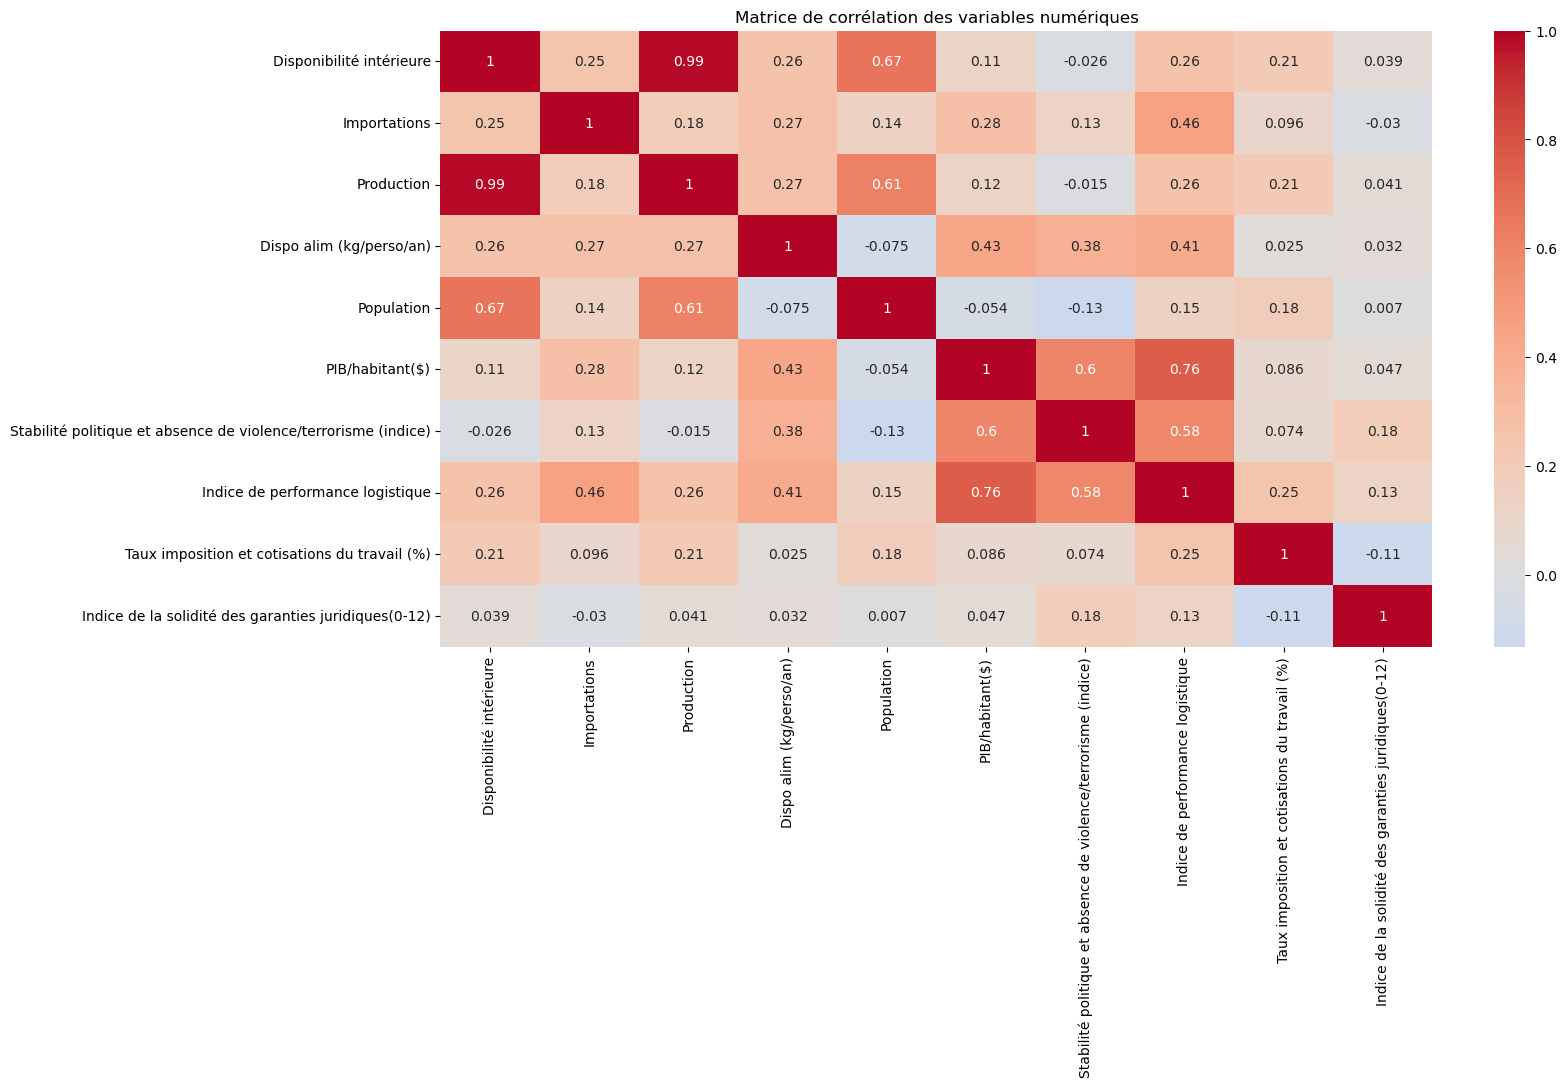

In [85]:
# Exclure la colonne 'Pays' de la sélection des colonnes numériques
numeric_features = DFLapoule.select_dtypes(include=[np.number])

# Calculer la matrice de corrélation
corr_matrix = numeric_features.corr()

plt.figure(figsize=(16, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matrice de corrélation des variables numériques')
plt.show()

/Users/fatih/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


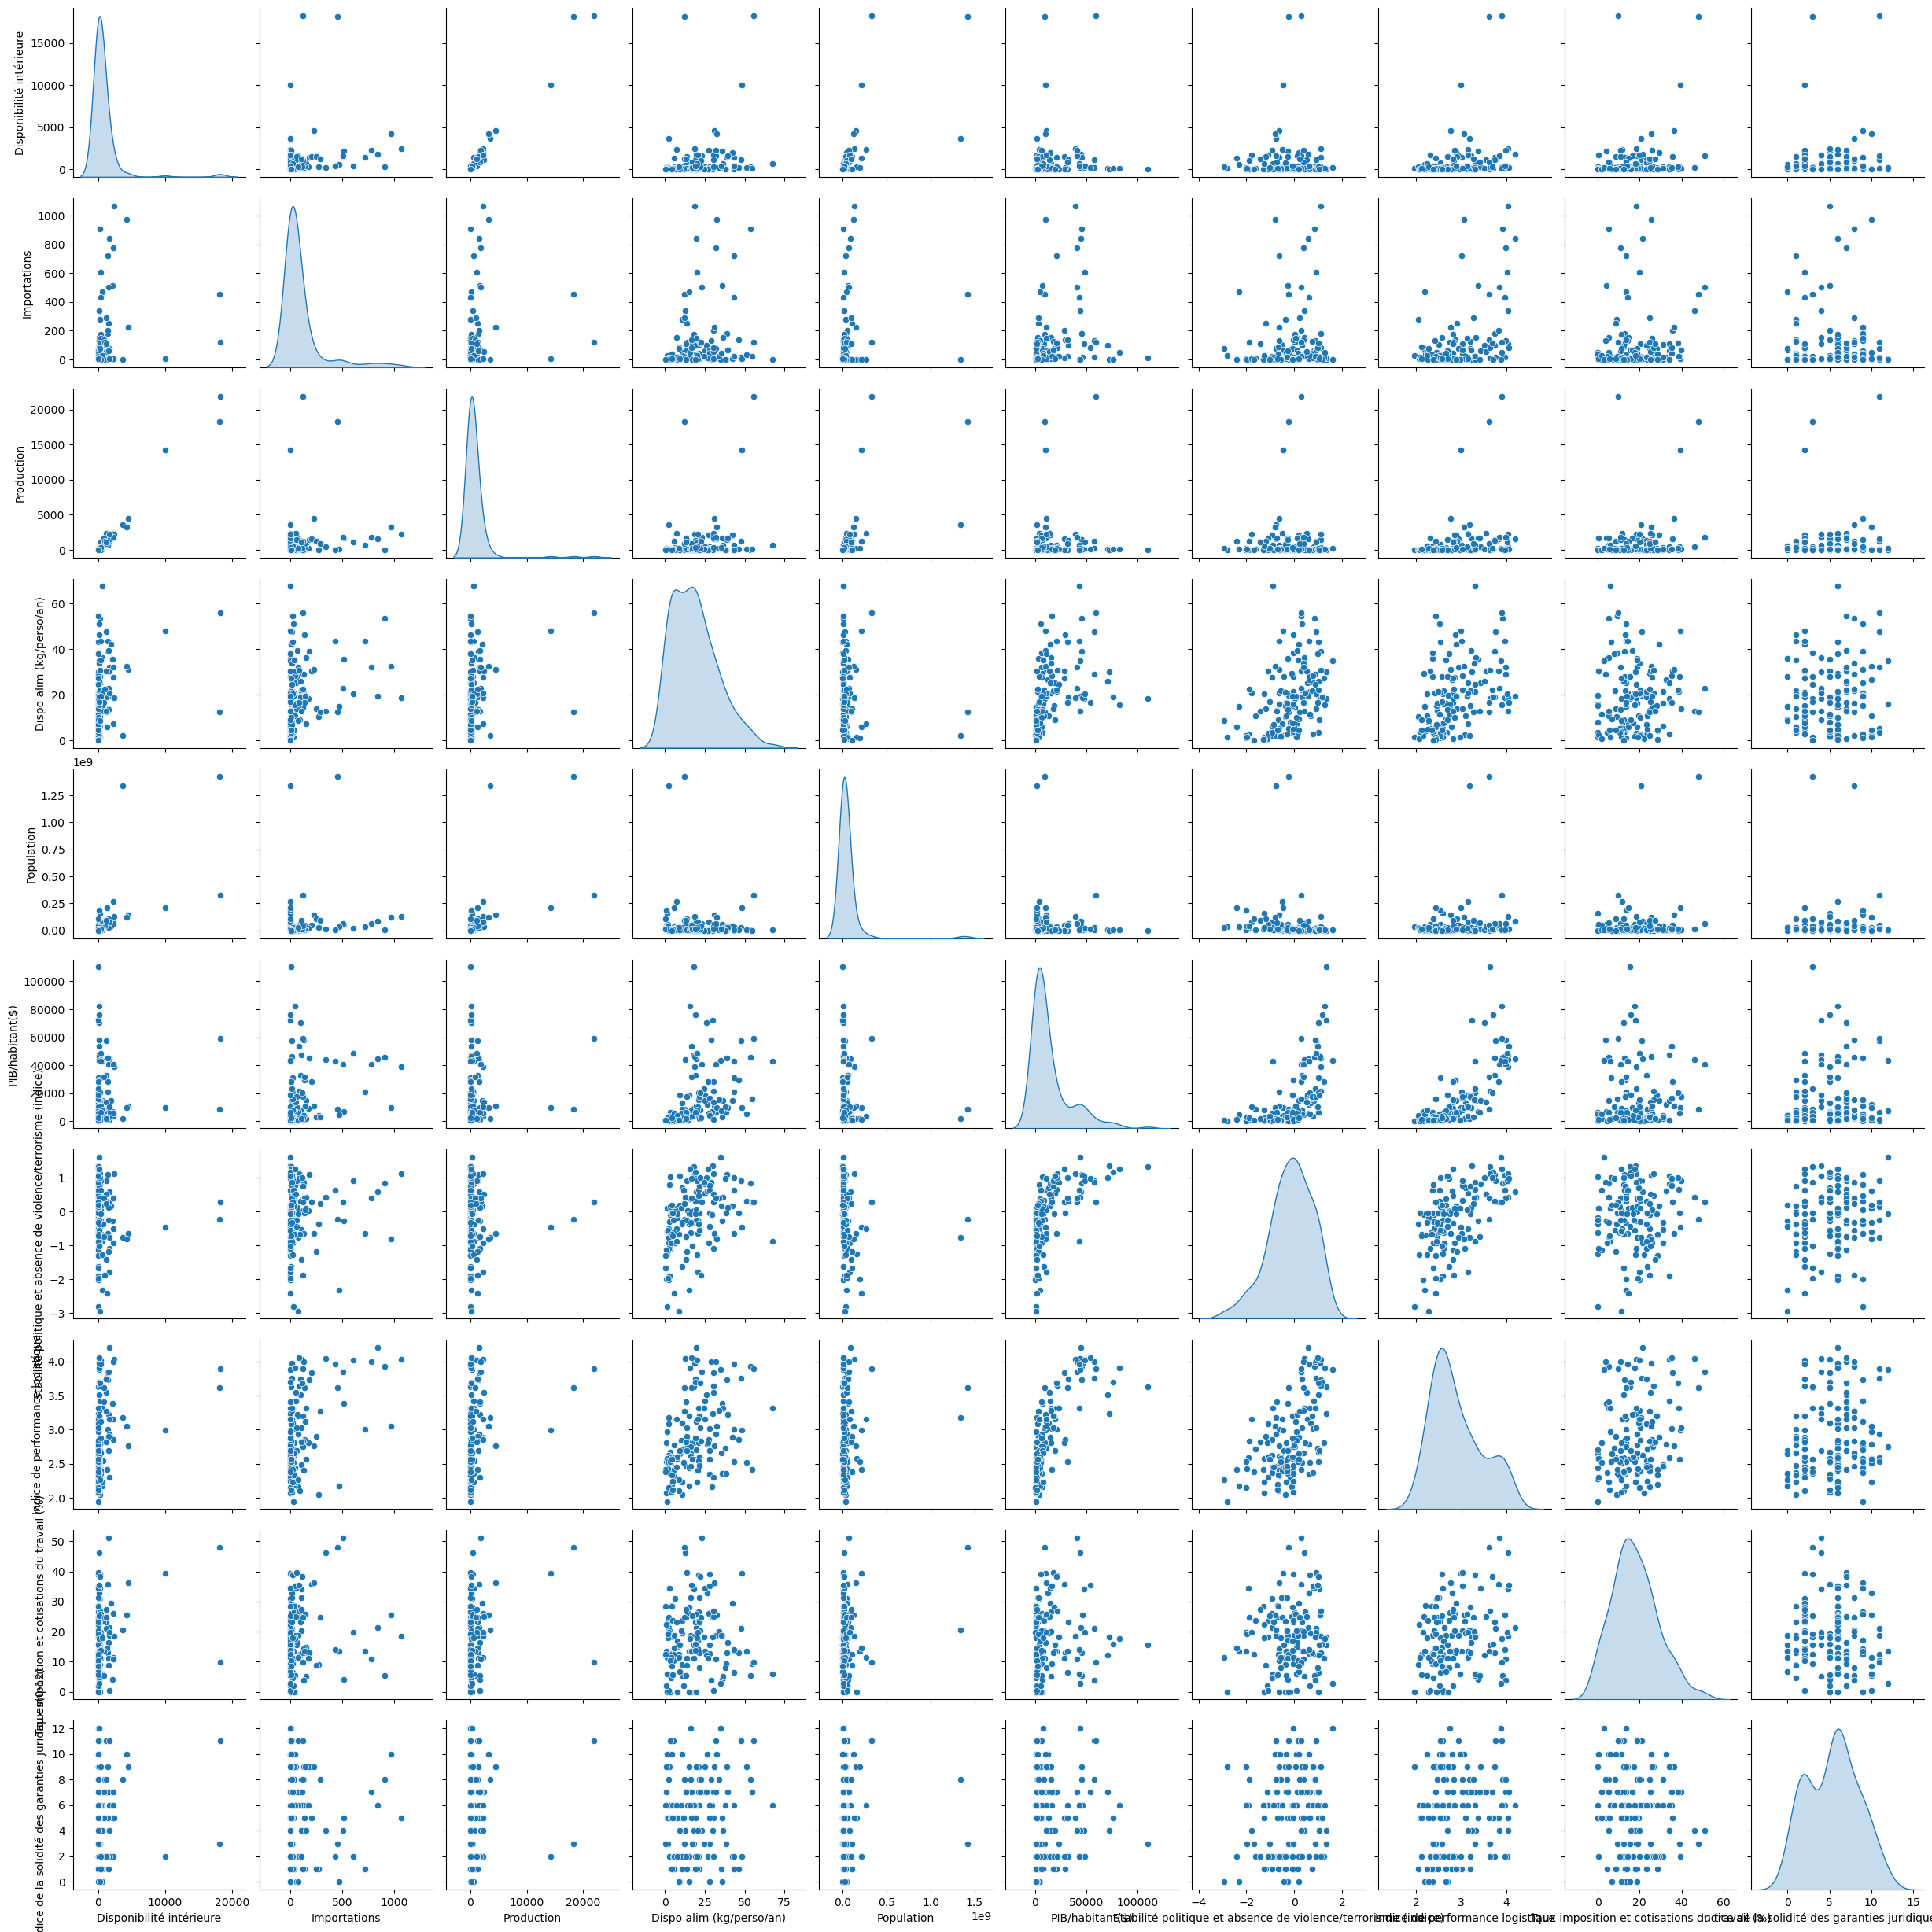

In [86]:
# Pairplot
sns.pairplot(DFLapoule.select_dtypes(include=[np.number]), diag_kind='kde')
plt.show()

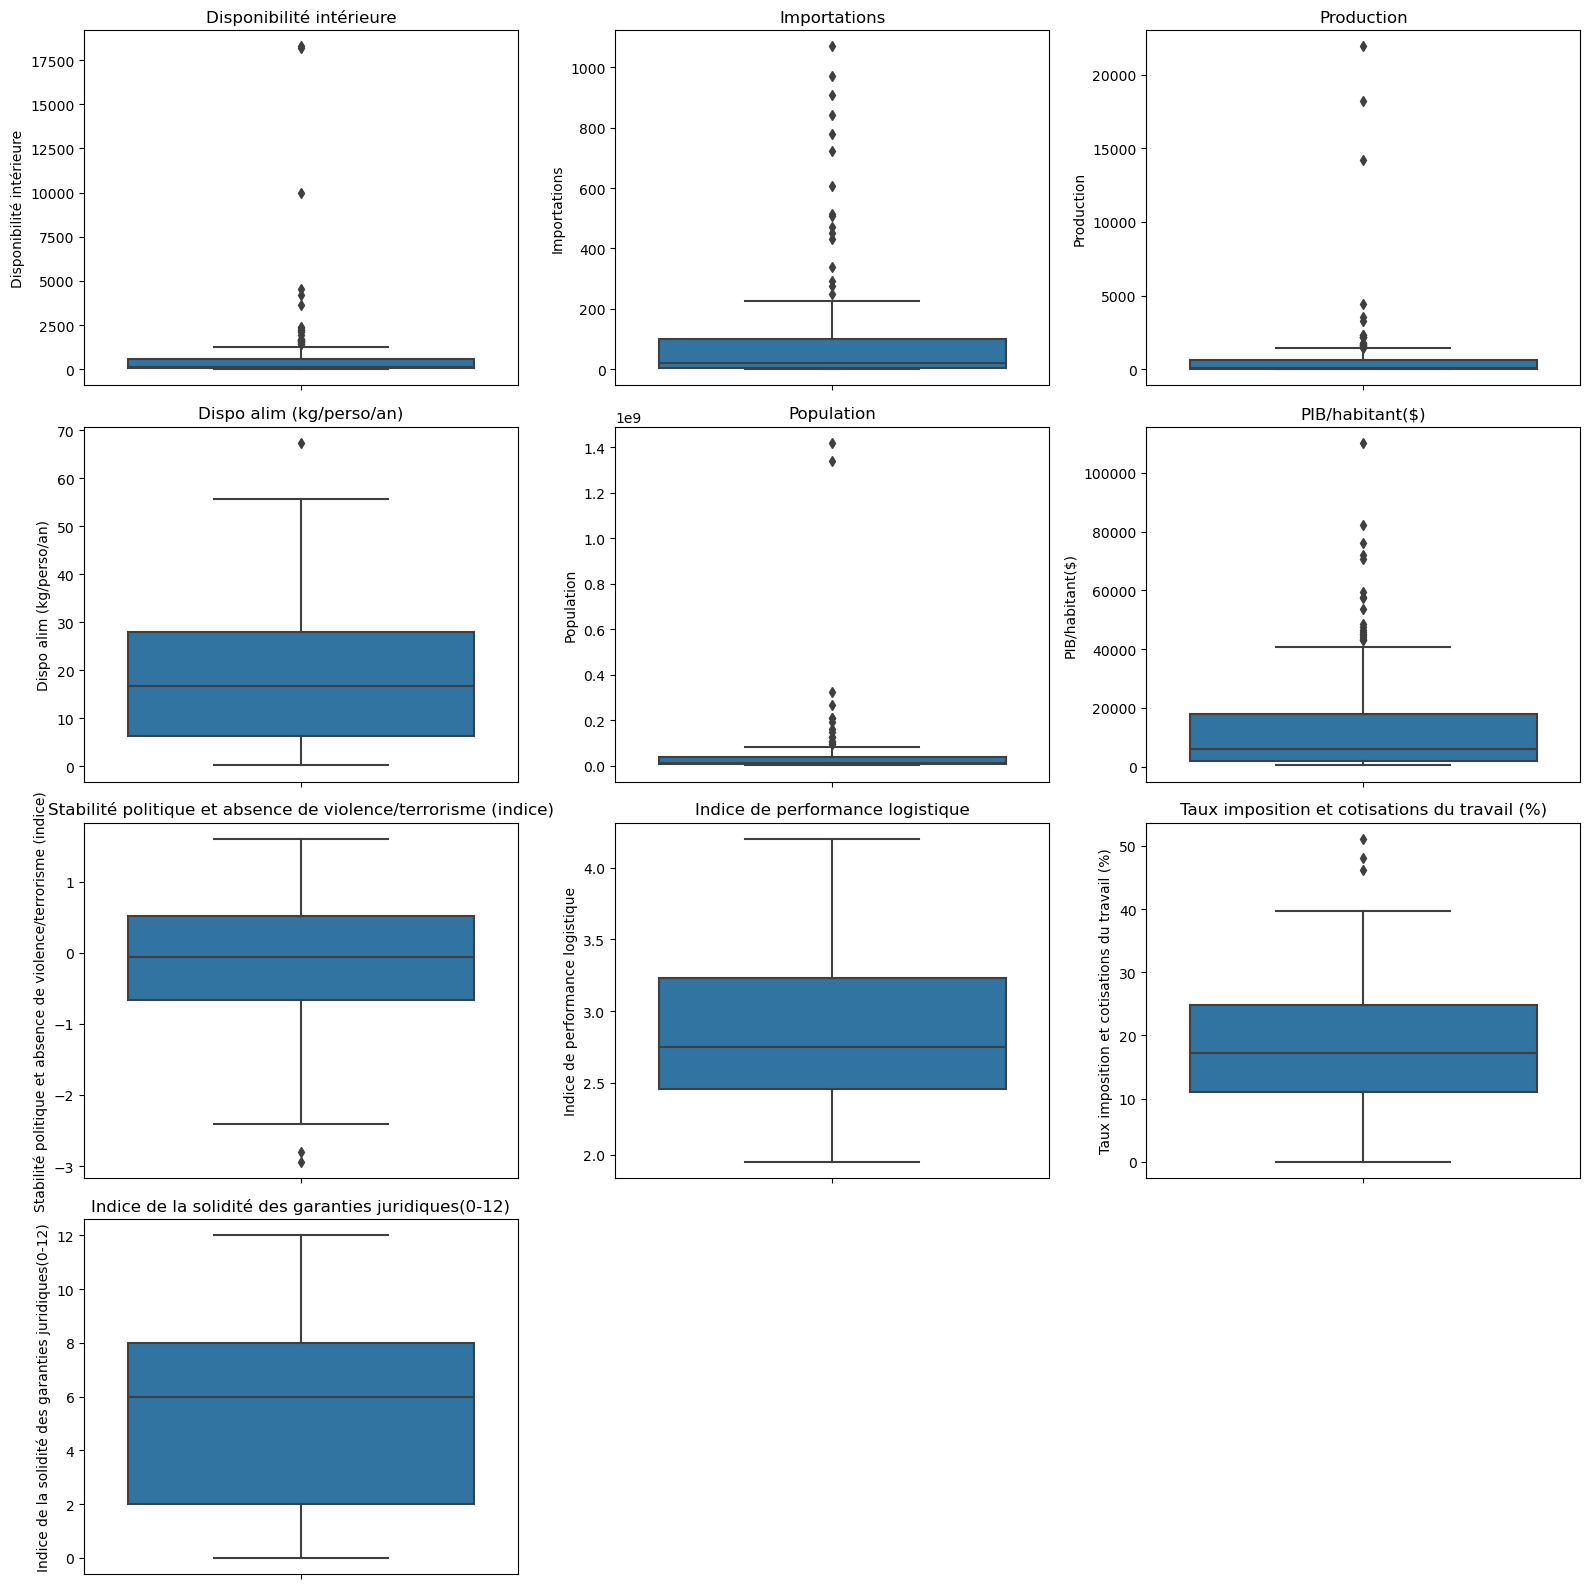

In [87]:
# Exclure la colonne 'Pays' et sélectionner uniquement les colonnes numériques
numeric_features = DFLapoule.select_dtypes(include=[np.number])
num_cols = numeric_features.shape[1]

# Calculer le nombre de lignes et de colonnes nécessaires pour la grille
num_rows = math.ceil(num_cols / 3)

# Créer une boîte à moustaches pour chaque variable numérique
plt.figure(figsize=(16, num_rows * 4))
for i, column in enumerate(numeric_features.columns, 1):
    plt.subplot(num_rows, 3, i)
    sns.boxplot(data=numeric_features, y=column)
    plt.title(column)

plt.tight_layout()
plt.show()

In [88]:
# Description du DFLapoule 

DFLapoule.describe()

,Disponibilité intérieure,Importations,Production,Dispo alim (kg/perso/an),Population,PIB/habitant($),Stabilité politique et absence de violence/terrorisme (indice),Indice de performance logistique,Taux imposition et cotisations du travail (%),Indice de la solidité des garanties juridiques(0-12)
count,145.000000,145.000000,145.000000,145.000000,1.450000e+02,145.000000,145.000000,145.000000,145.000000,145.000000
mean,796.255172,100.296552,834.613793,18.723586,4.999661e+07,14523.393103,-0.156000,2.890621,17.861379,5.413793
std,2351.357462,198.374860,2676.914310,14.159910,1.657691e+08,19808.990819,0.911574,0.558676,10.817766,3.056383
min,2.000000,0.000000,0.000000,0.130000,2.070890e+05,414.000000,-2.940000,1.950000,0.000000,0.000000
25%,50.000000,3.000000,28.000000,6.380000,4.665928e+06,1917.000000,-0.670000,2.460000,11.100000,2.000000
50%,134.000000,21.000000,104.000000,16.700000,1.119286e+07,5918.000000,-0.060000,2.750000,17.200000,6.000000
75%,566.000000,99.000000,600.000000,27.980000,3.673210e+07,17802.000000,0.520000,3.230000,24.800000,8.000000
max,18266.000000,1069.000000,21914.000000,67.390000,1.421022e+09,110203.000000,1.600000,4.200000,51.100000,12.000000


In [89]:
# Sauvegarde des données

# Spécification de l'itinéraire
chemin_fichier = '/Users/fatih/Desktop/9/DFLapoule.csv'

# Sauvegarde du DataFrame en fichier CSV
DFLapoule.to_csv(chemin_fichier, index=False)